In [57]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv('/content/ghgEmission.csv')

**Raw** **Data**

In [59]:
df.describe()

,Biofuels and waste,"Coal, peat and oil shale",Oil,Natural gas,CO2TES(tCO2 per TJ),year
count,1489.000000,736.000000,1489.000000,572.000000,1489.000000,2805.000000
mean,1.879437,19.303543,9.998516,9.437294,26.801398,1996.000000
std,4.602290,66.231015,17.556829,18.986965,21.968185,14.722226
min,0.000419,0.002157,0.041632,0.000303,0.329000,1971.000000
25%,0.190572,0.250003,1.188374,0.150986,9.316000,1983.000000
50%,0.689007,0.886346,2.446164,1.580009,15.614000,1996.000000
75%,1.590454,2.972576,9.636897,7.955379,47.346000,2009.000000
max,39.618539,374.369663,121.475662,107.638041,90.853000,2021.000000


In [60]:
countries = df['country'].unique()

In [61]:
# print(countries)

**Data has only African Countries**

####Biofuels and waste--unit (tCO2 per TJ)
####Coal, peat and oil shale--unit (tCO2 per TJ)
####Oil--unit (tCO2 per TJ)
####Natural gas--unit (tCO2 per TJ)
####CO2TES(tCO2 per TJ) ==  carbon dioxide (CO2) emissions produced per terajoule (TJ) of energy consumed
####country

In [62]:
types_of_columns = df.dtypes


In [63]:
columns_list = df.columns.tolist()
print(columns_list)

['Biofuels and waste', 'Coal, peat and oil shale', 'Oil', 'Natural gas', 'CO2TES(tCO2 per TJ)', 'country', 'year']





#### Removed Countries having no data What so Ever#

In [64]:
def noData(desh , df):
  allEmpty = True
  new_df = df[df['country'] == desh]

  for index, row in new_df.iterrows():
    value1 = row['Biofuels and waste']
    value2 = row['Coal, peat and oil shale']
    value3 = row['Oil']
    value4 = row['Natural gas']
    value5 = row['CO2TES(tCO2 per TJ)']
    if pd.notna(value1) or pd.notna(value2) or pd.notna(value2) or pd.notna(value2) or pd.notna(value2):
      allEmpty = False
  return allEmpty


empty = noData('Cameroon',df)
if empty:
  print('Does not have any data in one of the columns')
else:
  print('Has some data in one of the columns or all')

Has some data in one of the columns or all


#### Taking out countries with no Data in any of the GFG producing parameters

In [65]:
for value in countries:
  if noData(value,df):
    df = df[df['country'] != value]

#### Countries after Removing countries with no parameter value#

In [66]:
countries = df['country'].unique()

print(len(countries))

31


'Algeria' 'Angola' 'Benin' 'Botswana' 'Cameroon'
 'Democratic Republic of the Congo' 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Ethiopia' 'Gabon' 'Ghana' 'Kenya' 'Libya' 'Madagascar' 'Mauritius'
 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Rwanda' 'Senegal'
 'South Africa' 'South Sudan' 'Sudan' 'Togo' 'Tunisia' 'Uganda' 'Zambia'
 'Zimbabwe'








In [67]:
new_df = df

<li>Dictionary of list containing the average of all factors producing GFG gases</li>
<li>Mapping = Country Name ===>> List of Attributes contibuting to CO2 Emission</li>
<li>Index = 0 --> Biofuels and waste</li>
<li>Index = 1 --> Coal, peat and oil shale</li>
<li>Index = 2 --> Oil</li>
<li>Index = 3 --> Natural gas</li>
<li>Index = 4 --> CO2TES(tCO2 per TJ)</li>

In [68]:
dict_averages_all ={}
for value in countries :
  average1 = df[df['country'] == value]['Biofuels and waste'].mean()

  average2 = df[df['country'] == value]['Coal, peat and oil shale'].mean()

  average3 = df[df['country'] == value]['Oil'].mean()

  average4 = df[df['country'] == value]['Natural gas'].mean()

  average5 = df[df['country'] == value]['CO2TES(tCO2 per TJ)'].mean()

  dict_averages_all[value] = [average1 , average2 ,average3 , average4 ,average5]



for key, value in dict_averages_all.items():
    print(f"{key}: {value}")

Algeria: [0.005031607843137255, 0.8032333800000001, 28.872792078431374, 36.95884921568627, 56.323627450980396]
Angola: [1.203202450980392, nan, 6.828098921568627, 0.9247679019607843, 19.958862745098042]
Benin: [0.39945086274509806, 0.21262471428571428, 2.137286254901961, 0.11754877777777778, 15.628254901960783]
Botswana: [0.15160027450980393, 1.8103111, 1.516970549019608, nan, 48.705117647058835]
Cameroon: [1.4645992745098033, nan, 2.957185588235294, 0.9079702, 12.013862745098036]
Democratic Republic of the Congo: [3.7205209999999997, 0.8861451499999999, 1.9274369607843136, 0.023853181818181815, 4.505333333333333]
Egypt: [0.34298817647058827, 3.4010538627450986, 66.66413631372548, 37.33882735294118, 55.58941176470588]
Equatorial Guinea: [0.03541368292682926, nan, 0.4367369756097561, 1.8562342083333327, 29.90934146341463]
Eritrea: [0.15206286666666669, nan, 0.5935775333333332, nan, 17.2864]
Ethiopia: [7.526907392156864, 0.8756683571428571, 4.165286392156863, nan, 3.688509803921569]
Gabo

#### Clearing out the NAN Values

In [69]:
for key, value in dict_averages_all.items():
  for i in range(len(value)):
    if np.isnan(value[i]):
      value[i]=0


#### Fianl Dictionaries

In [70]:
for key, value in dict_averages_all.items():
    print(f"{key}: {value}")

Algeria: [0.005031607843137255, 0.8032333800000001, 28.872792078431374, 36.95884921568627, 56.323627450980396]
Angola: [1.203202450980392, 0, 6.828098921568627, 0.9247679019607843, 19.958862745098042]
Benin: [0.39945086274509806, 0.21262471428571428, 2.137286254901961, 0.11754877777777778, 15.628254901960783]
Botswana: [0.15160027450980393, 1.8103111, 1.516970549019608, 0, 48.705117647058835]
Cameroon: [1.4645992745098033, 0, 2.957185588235294, 0.9079702, 12.013862745098036]
Democratic Republic of the Congo: [3.7205209999999997, 0.8861451499999999, 1.9274369607843136, 0.023853181818181815, 4.505333333333333]
Egypt: [0.34298817647058827, 3.4010538627450986, 66.66413631372548, 37.33882735294118, 55.58941176470588]
Equatorial Guinea: [0.03541368292682926, 0, 0.4367369756097561, 1.8562342083333327, 29.90934146341463]
Eritrea: [0.15206286666666669, 0, 0.5935775333333332, 0, 17.2864]
Ethiopia: [7.526907392156864, 0.8756683571428571, 4.165286392156863, 0, 3.688509803921569]
Gabon: [0.34115111

In [71]:
Average_df = pd.DataFrame(dict_averages_all)
Average_df

,Algeria,Angola,Benin,Botswana,Cameroon,Democratic Republic of the Congo,Egypt,Equatorial Guinea,Eritrea,Ethiopia,...,Rwanda,Senegal,South Africa,South Sudan,Sudan,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,0.005032,1.203202,0.399451,0.151600,1.464599,3.720521,0.342988,0.035414,0.152063,7.526907,...,0.819648,0.237103,1.808805,0.061244,1.492260,0.283589,0.222206,2.216335,1.140124,1.885635
1,0.803233,0.000000,0.212625,1.810311,0.000000,0.886145,3.401054,0.000000,0.000000,0.875668,...,0.116087,1.052706,249.659530,0.000000,0.003036,0.000000,0.304500,0.000000,0.982122,8.400515
2,28.872792,6.828099,2.137286,1.516971,2.957186,1.927437,66.664136,0.436737,0.593578,4.165286,...,0.542726,3.399080,49.896195,1.694880,8.305446,0.826581,9.500941,1.866838,2.171564,2.676295
3,36.958849,0.924768,0.117549,0.000000,0.907970,0.023853,37.338827,1.856234,0.000000,0.000000,...,0.044996,0.035658,3.936460,0.000000,0.000000,0.107523,5.649336,0.000000,0.000000,0.000000
4,56.323627,19.958863,15.628255,48.705118,12.013863,4.505333,55.589412,29.909341,17.286400,3.688510,...,3.086490,33.783000,71.716667,53.422600,13.947961,10.164824,56.285941,3.816922,12.021412,29.650098


In [72]:
def top_n_values(row, n=5):
    top_n_idx = row.nlargest(n).index
    return [(col, row[col]) for col in top_n_idx]

top_n_values_df = Average_df.apply(top_n_values, axis=1)

result_df = pd.DataFrame(top_n_values_df.tolist(), columns=[f'Top_{i+1}' for i in range(5)])


#### Top 5 Countries with their average GFG Emissiom

In [73]:
index_mapping = {0: 'Biofuels and waste', 1: 'Coal, peat and oil shale', 2: 'Oil', 3: 'Natural gas', 4: 'CO2TES(tCO2 per TJ)'}
result_df = result_df.rename(index=index_mapping)
result_df

,Top_1,Top_2,Top_3,Top_4,Top_5
Biofuels and waste,"(Nigeria, 22.968368549019605)","(Ethiopia, 7.526907392156864)","(Democratic Republic of the Congo, 3.720520999...","(Uganda, 2.216335137254902)","(Kenya, 2.0782648627450984)"
"Coal, peat and oil shale","(South Africa, 249.65953023529414)","(Morocco, 8.725409607843138)","(Zimbabwe, 8.400515078431372)","(Egypt, 3.4010538627450986)","(Botswana, 1.8103111)"
Oil,"(Egypt, 66.66413631372548)","(South Africa, 49.89619484313725)","(Nigeria, 31.57726980392157)","(Algeria, 28.872792078431374)","(Libya, 22.53528425490196)"
Natural gas,"(Egypt, 37.33882735294118)","(Algeria, 36.95884921568627)","(Nigeria, 13.618380882352941)","(Libya, 7.324936450980393)","(Tunisia, 5.649335588235294)"
CO2TES(tCO2 per TJ),"(South Africa, 71.71666666666665)","(Morocco, 63.31413725490196)","(Algeria, 56.323627450980396)","(Tunisia, 56.28594117647059)","(Egypt, 55.58941176470588)"


In [74]:
def bottom_n_values(row, n=5):
    bottom_n_idx = row.nsmallest(n).index
    return [(col, row[col]) for col in bottom_n_idx]

In [75]:
bottom_n_values_df = Average_df.apply(bottom_n_values, axis=1)
result1_df = pd.DataFrame(bottom_n_values_df.tolist(), columns=[f'Bottom_{i+1}' for i in range(5)])

result1_df = result1_df.rename(index=index_mapping)
result1_df

,Bottom_1,Bottom_2,Bottom_3,Bottom_4,Bottom_5
Biofuels and waste,"(Algeria, 0.005031607843137255)","(Mauritius, 0.023356627450980393)","(Equatorial Guinea, 0.03541368292682926)","(Namibia, 0.057350612903225795)","(Libya, 0.05813650980392158)"
"Coal, peat and oil shale","(Angola, 0.0)","(Cameroon, 0.0)","(Equatorial Guinea, 0.0)","(Eritrea, 0.0)","(Gabon, 0.0)"
Oil,"(Equatorial Guinea, 0.4367369756097561)","(Rwanda, 0.5427257647058823)","(Eritrea, 0.5935775333333332)","(Niger, 0.7269458823529412)","(Togo, 0.8265810196078432)"
Natural gas,"(Botswana, 0.0)","(Eritrea, 0.0)","(Ethiopia, 0.0)","(Kenya, 0.0)","(Madagascar, 0.0)"
CO2TES(tCO2 per TJ),"(Rwanda, 3.0864901960784312)","(Ethiopia, 3.688509803921569)","(Uganda, 3.8169215686274516)","(Democratic Republic of the Congo, 4.505333333...","(Mozambique, 7.342098039215687)"


####Continent Average set for those Countries having no data for a Particular kind of Emmision Attribute #

In [76]:
li =[]
for key, value in dict_averages_all.items():

  li.append(value)

column_names = ['Biofuels and waste Average', 'Coal, peat and oil shale Average', 'Oil Average', 'Natural gas Average', 'CO2TES(tCO2 per TJ) Average']
country_average_df = pd.DataFrame(li,columns = column_names)


continent_avg =[country_average_df['Biofuels and waste Average'].mean(), country_average_df['Coal, peat and oil shale Average'].mean(),country_average_df['Oil Average'].mean(),country_average_df['Natural gas Average'].mean(),country_average_df['CO2TES(tCO2 per TJ) Average'].mean()]
print(column_names)
print(continent_avg)




['Biofuels and waste Average', 'Coal, peat and oil shale Average', 'Oil Average', 'Natural gas Average', 'CO2TES(tCO2 per TJ) Average']
[1.7746279488218424, 9.077467833799851, 9.504778954253924, 3.6408147749510658, 27.614706267035128]


In [77]:
condition = new_df['country']=='Angola'
test_df = new_df.loc[condition,'Coal, peat and oil shale']
test_np = test_df.to_numpy()
print((test_np))

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [78]:
indexToAttribute ={
      "Biofuels and waste": 0,
      "Coal, peat and oil shale" : 1,
      "Oil" : 2,
      'Natural gas' : 3,
      'CO2TES(tCO2 per TJ)' : 4
  }
st =  "Coal, peat and oil shale"
print(continent_avg[indexToAttribute[st]])

9.077467833799851


In [79]:
def fillTheColumn(new_df,country , attribute ):
  condition = new_df['country']==country
  test_df = new_df.loc[condition,attribute]
  test_np = test_df.to_numpy()
  # Checking if the whole column is nan , if so then filling it with the continent average
  indexToAttribute ={
      "Biofuels and waste": 0,
      "Coal, peat and oil shale" : 1,
      "Oil" : 2,
      'Natural gas' : 3,
      'CO2TES(tCO2 per TJ)' : 4
  }
  are_all_nan = np.all(np.isnan(test_np))
  if are_all_nan:
    i=0
    while i< len(test_np):
      test_np[i]  =0
      i+=1
    Done_df = pd.DataFrame(test_np,columns = [attribute])
    return Done_df
  # Average inserted above for those countries where no data was available for a particular attribute
  li=[]
  for i in range(len(test_np)):
    if not np.isnan(test_np[i]) and i>0:
      prev= i-1
      if np.isnan(test_np[prev]):
        li.append(test_np[i])


  flag =0
  index_li =0
  i =0
  last_null =0;
  while i< len(test_np) and len(li)>0:
    if np.isnan(test_np[i]):
      cur_ind = i
      while index_li<len(li) and cur_ind<len(test_np) and np.isnan(test_np[cur_ind]):
        test_np[cur_ind] =li[index_li]

        cur_ind+=1
      index_li+=1
      if index_li == len(li):
        break
      i = cur_ind
    else :
      i+=1
      last_null=i


  i=0
  while i<len(test_np):
    if i>0 and np.isnan(test_np[i]):
      test_np[i] = test_np[i-1]
    i+=1

  column = [attribute]
  Coverted_df = pd.DataFrame(test_np,columns = column)
  return Coverted_df


resultant_df = fillTheColumn(new_df , 'Angola' , 'Coal, peat and oil shale')

In [80]:
def func1(new_df , country):
  selected_column1 = fillTheColumn(new_df , country , 'Biofuels and waste')
  selected_column2 = fillTheColumn(new_df , country , 'Coal, peat and oil shale')
  selected_column3 = fillTheColumn(new_df , country , 'Oil')
  selected_column4 = fillTheColumn(new_df , country , 'Natural gas')
  selected_column5 = fillTheColumn(new_df , country , 'CO2TES(tCO2 per TJ)')

  first_li=[]
  second_li =[]
  for i in range(len(selected_column1)):
    first_li.append(country)
  for i in range(len(selected_column1)):
    second_li.append((1971+i))
  df_country = pd.DataFrame({'country': first_li})
  df_year    = pd.DataFrame({'year': second_li})
  concatenated_df = pd.concat([selected_column1, selected_column2,selected_column3,selected_column4,selected_column5,df_country,df_year], axis=1)
  return concatenated_df

In [81]:
resultant_df = pd.DataFrame()
for i in range(len(countries)):
  temp_df=func1(new_df , countries[i])
  resultant_df = resultant_df.append(temp_df, ignore_index=True)

In [82]:
resultant_df.to_csv('new.csv', index=False)

#### A Bar Graph Showing the values of difereent attributes used in predicting the CO2 for all countries , averaged across all the years

In [83]:

country =[]
Biofuels_and_waste =[]
Coal_peat_and_oil_shale =[]
Oil = []
Natural_gas = []
for key, value in dict_averages_all.items():
  country.append(key)
  Biofuels_and_waste.append(value[0])
  Coal_peat_and_oil_shale.append(value[1])
  Oil.append(value[2])
  Natural_gas.append(value[3])

Biofuels_and_waste_df = pd.DataFrame(Biofuels_and_waste , columns =["Value"])
Coal_peat_and_oil_shale_df = pd.DataFrame(Coal_peat_and_oil_shale , columns =["Value"])
Oil_df = pd.DataFrame(Oil , columns =["Value"])
Natural_gas_df = pd.DataFrame(Natural_gas , columns =["Value"])
country_df = pd.DataFrame(country , columns =["country"])
# Final DFs that will be used for plotting
Biofuels_and_waste_df = pd.concat([Biofuels_and_waste_df,country_df], axis=1)
Coal_peat_and_oil_shale_df = pd.concat([Coal_peat_and_oil_shale_df,country_df], axis=1)
Oil_df = pd.concat([Oil_df,country_df], axis=1)
Natural_gas_df = pd.concat([Natural_gas_df,country_df], axis=1)


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Graphs Representing the Country wise GFG Emission attribute

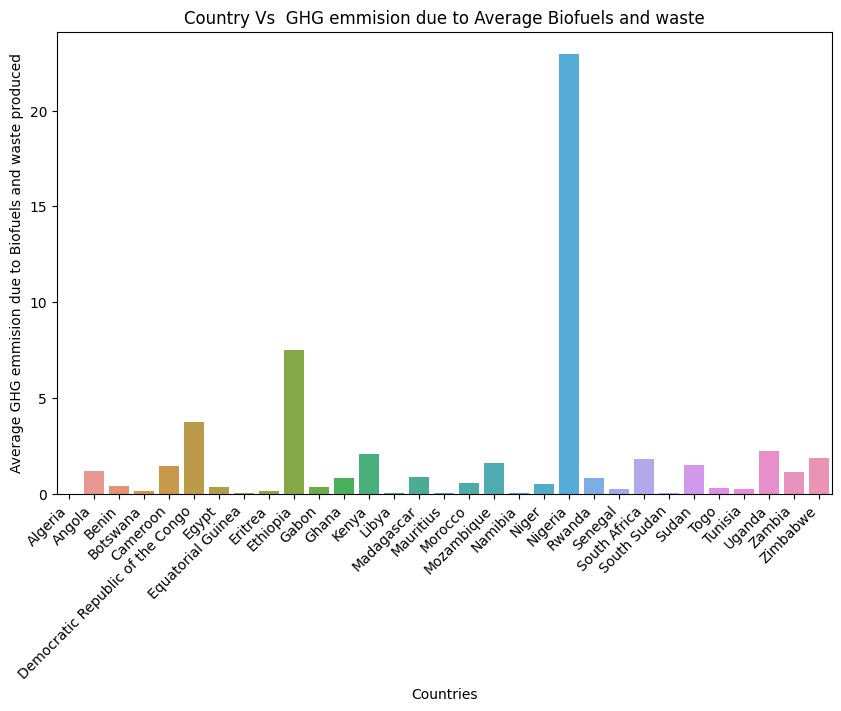

In [124]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='Value', data=Biofuels_and_waste_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Countries')
plt.ylabel('Average GHG emmision due to Biofuels and waste produced')
plt.title('Country Vs  GHG emmision due to Average Biofuels and waste')
plt.show()


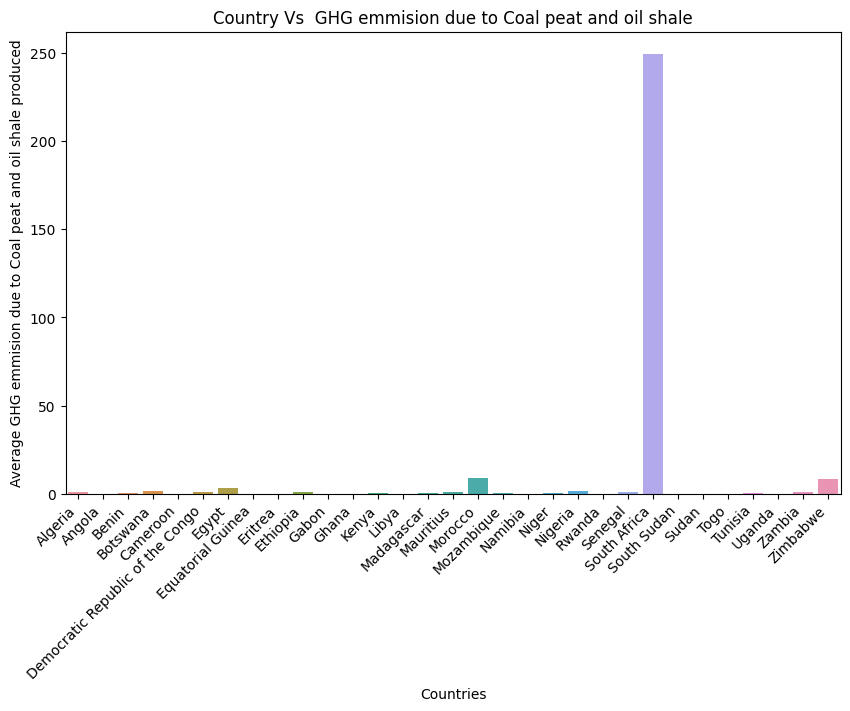

In [125]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='Value', data=Coal_peat_and_oil_shale_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Countries')
plt.ylabel('Average GHG emmision due to Coal peat and oil shale produced')
plt.title('Country Vs  GHG emmision due to Coal peat and oil shale')
plt.show()

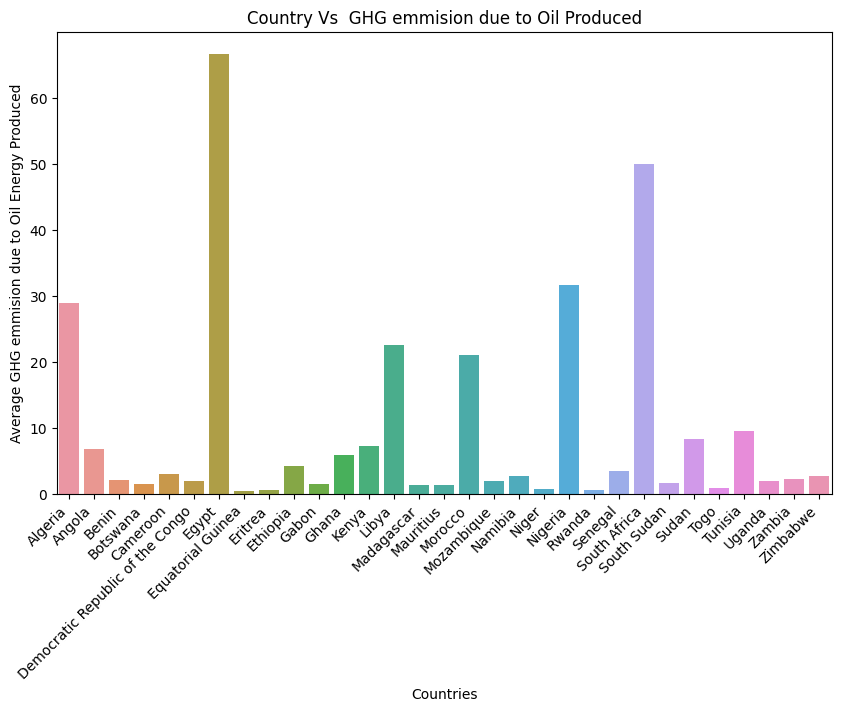

In [126]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='Value', data=Oil_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Countries')
plt.ylabel('Average GHG emmision due to Oil Energy Produced')
plt.title('Country Vs  GHG emmision due to Oil Produced')
plt.show()

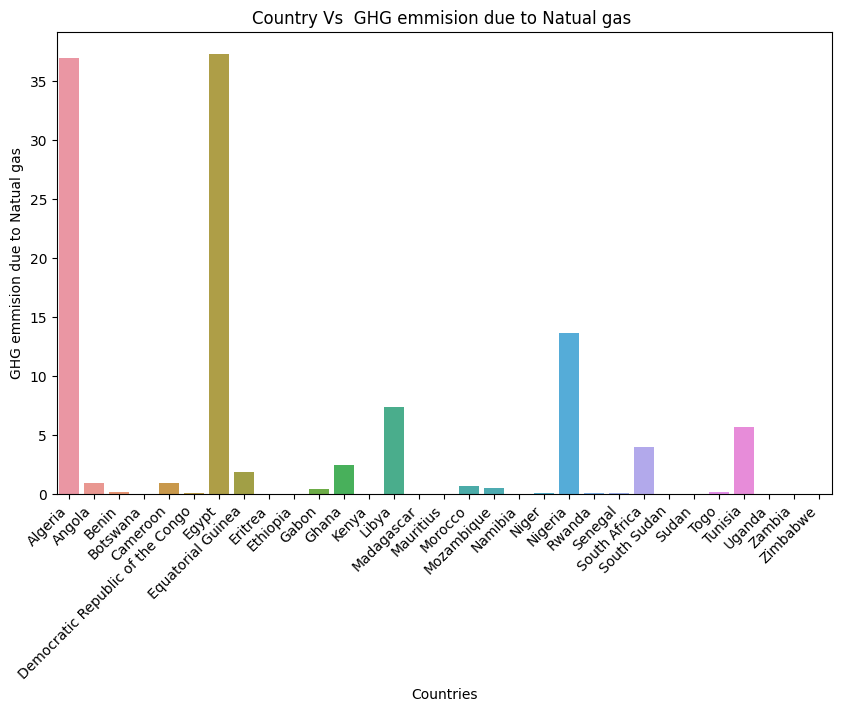

In [127]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='Value', data=Natural_gas_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Countries')
plt.ylabel('GHG emmision due to Natual gas')
plt.title('Country Vs  GHG emmision due to Natual gas ')
plt.show()

In [89]:
result_df

,Top_1,Top_2,Top_3,Top_4,Top_5
Biofuels and waste,"(Nigeria, 22.968368549019605)","(Ethiopia, 7.526907392156864)","(Democratic Republic of the Congo, 3.720520999...","(Uganda, 2.216335137254902)","(Kenya, 2.0782648627450984)"
"Coal, peat and oil shale","(South Africa, 249.65953023529414)","(Morocco, 8.725409607843138)","(Zimbabwe, 8.400515078431372)","(Egypt, 3.4010538627450986)","(Botswana, 1.8103111)"
Oil,"(Egypt, 66.66413631372548)","(South Africa, 49.89619484313725)","(Nigeria, 31.57726980392157)","(Algeria, 28.872792078431374)","(Libya, 22.53528425490196)"
Natural gas,"(Egypt, 37.33882735294118)","(Algeria, 36.95884921568627)","(Nigeria, 13.618380882352941)","(Libya, 7.324936450980393)","(Tunisia, 5.649335588235294)"
CO2TES(tCO2 per TJ),"(South Africa, 71.71666666666665)","(Morocco, 63.31413725490196)","(Algeria, 56.323627450980396)","(Tunisia, 56.28594117647059)","(Egypt, 55.58941176470588)"


In [90]:
result1_df.head()

,Bottom_1,Bottom_2,Bottom_3,Bottom_4,Bottom_5
Biofuels and waste,"(Algeria, 0.005031607843137255)","(Mauritius, 0.023356627450980393)","(Equatorial Guinea, 0.03541368292682926)","(Namibia, 0.057350612903225795)","(Libya, 0.05813650980392158)"
"Coal, peat and oil shale","(Angola, 0.0)","(Cameroon, 0.0)","(Equatorial Guinea, 0.0)","(Eritrea, 0.0)","(Gabon, 0.0)"
Oil,"(Equatorial Guinea, 0.4367369756097561)","(Rwanda, 0.5427257647058823)","(Eritrea, 0.5935775333333332)","(Niger, 0.7269458823529412)","(Togo, 0.8265810196078432)"
Natural gas,"(Botswana, 0.0)","(Eritrea, 0.0)","(Ethiopia, 0.0)","(Kenya, 0.0)","(Madagascar, 0.0)"
CO2TES(tCO2 per TJ),"(Rwanda, 3.0864901960784312)","(Ethiopia, 3.688509803921569)","(Uganda, 3.8169215686274516)","(Democratic Republic of the Congo, 4.505333333...","(Mozambique, 7.342098039215687)"


#### Heat Map Showing Inter Realation of different Energy Sources and CO2 emmitted#

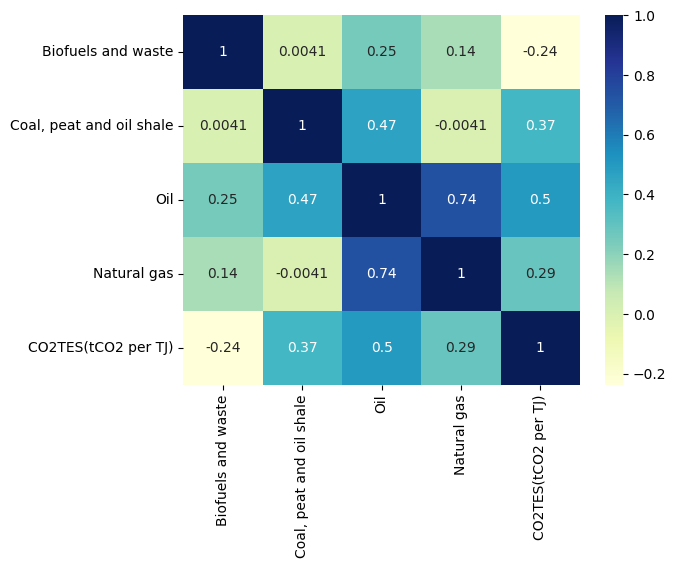

In [91]:
columnsToExclude = ['country','year']
dfForHeatMap = resultant_df.drop(columns=columnsToExclude)


corr_table = dfForHeatMap.corr()
sb.heatmap(corr_table, cmap="YlGnBu", annot=True)
plt.show()

In [92]:
resultant_df.head()

,Biofuels and waste,"Coal, peat and oil shale",Oil,Natural gas,CO2TES(tCO2 per TJ),country,year
0,0.002251,0.384980,5.920485,2.383026,59.253,Algeria,1971
1,0.002329,0.372553,6.312181,3.058608,57.281,Algeria,1972
2,0.002381,0.414828,7.169531,3.524308,54.459,Algeria,1973
3,0.002390,0.282616,7.702091,4.081844,54.996,Algeria,1974
4,0.002433,0.326198,8.708710,4.654142,58.629,Algeria,1975


In [93]:
# resultant_df
resultant_df = resultant_df.sort_values(by='year', ascending=True)

In [94]:
resultant_df.head()

,Biofuels and waste,"Coal, peat and oil shale",Oil,Natural gas,CO2TES(tCO2 per TJ),country,year
0,0.002251,0.384980,5.920485,2.383026,59.253,Algeria,1971
1428,1.148808,0.000000,0.813858,0.000000,4.105,Uganda,1971
153,0.056046,0.017957,0.151253,0.000000,17.369,Botswana,1971
357,0.035413,0.000000,0.083367,0.039420,15.238,Equatorial Guinea,1971
1224,0.058574,0.000000,1.438998,0.000000,53.142,South Sudan,1971


####One Hot Encoder on Country Column

In [95]:
# One hot encoding on the Country column
from sklearn.preprocessing import OneHotEncoder
new_test_df = resultant_df
target_column = 'country'
target_values = df['country']
target_values = target_values.values
encoder = OneHotEncoder(sparse=False)
encoded_values = encoder.fit_transform(target_values.reshape(-1, 1))


In [96]:
column_names = ['Algeria' ,'Angola' ,'Benin', 'Botswana' ,'Cameroon', 'Democratic Republic of the Congo', 'Egypt', 'Equatorial Guinea' ,'Eritrea', 'Ethiopia' ,'Gabon', 'Ghana' ,'Kenya', 'Libya', 'Madagascar', 'Mauritius',  'Morocco', 'Mozambique' ,'Namibia', 'Niger' ,'Nigeria', 'Rwanda', 'Senegal', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia','Uganda','Zambia', 'Zimbabwe']

In [97]:
encoded_df = pd.DataFrame(encoded_values, columns=column_names)

In [98]:
df_encoded = pd.concat([new_test_df, encoded_df], axis=1)


In [99]:
df_encoded = df_encoded.drop(target_column, axis=1)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor


In [101]:
X = df_encoded.drop(['CO2TES(tCO2 per TJ)'], axis=1)
y = df_encoded['CO2TES(tCO2 per TJ)']
# total_rows = y.shape[0]
# split_index = int(0.8 * total_rows)
# X_train = X.iloc[:split_index]
# X_test = X.iloc[split_index:]
# y_train = y.iloc[:split_index]
# y_test = y.iloc[split_index:]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [104]:
X_train.shape

(1264, 36)

#### Linear regression

In [105]:
#Defining the model
reg = LinearRegression()
reg.fit(X_train, y_train)

#Testing for Latest Years
y_pred = reg.predict(X_test)

#Calculating MSE's
mse = mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)
# print(f'R-squared: {r2}')

parameters = {
    'Mean squared error': [mse],
    'r2 Score' : [r2]

}
error_df = pd.DataFrame(parameters)

error_df

,Mean squared error,r2 Score
0,43.862304,0.905764


In [106]:
# def predict_function(model,country,year):
#     # Example: Predict CO2 emissions for the year 1980 in a specific country
#     country_to_predict = country
#     year_to_predict = year
#     year_to_predict = np.hstack([year])
#     # Encode the country using the same LabelEncoder instance
#     encoded_country = encoder.transform([[country_to_predict]]).reshape(1, -1)

#     # Make the prediction

#     for a in encoded_country:
#       input_data = np.concatenate([year_to_predict, a]).reshape(1, -1)
#       prediction = model.predict(input_data)

#       print(f"Predicted CO2 emissions for {country_to_predict} in {year_to_predict[0]}: {prediction[0]}")

In [107]:
# predict_function(reg ,'Algeria' , 2023 )

####SVM####

In [108]:
columns = ['C_value', 'MSE Error','R2 Score']
Svm_Linear_df = pd.DataFrame(columns=columns)

In [109]:
C_values = [1e-5,0.0001,0.001,0.01,0.1, 0.5, 1, 2, 5]
j=0
for i in C_values:
  svr = SVR(kernel='linear', C =i )
  svr.fit(X_train, y_train)
  y_pred = svr.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  Svm_Linear_df.loc[j] = [i , mse , r2]
  j+=1

In [110]:
Svm_Linear_df

,C_value,MSE Error,R2 Score
0,0.00001,456.952855,0.018256
1,0.00010,410.984971,0.117016
2,0.00100,367.144129,0.211206
3,0.01000,342.329388,0.264520
4,0.10000,260.532465,0.440257
5,0.50000,95.812741,0.794150
6,1.00000,66.927598,0.856209
7,2.00000,77.651791,0.833168
8,5.00000,462.559627,0.006210


In [111]:
# columns = ['C_value', 'MSE Error']
Svm_rbf_df = pd.DataFrame(columns=columns)

In [118]:
C_values = [5000,7000,10000,13000,15000,18000,20000,40000,60000,80000,100000,2000000,1000000,5000000,10000000]

In [119]:
j=0
for i in C_values:
  svr = SVR(kernel='rbf', C =i )
  svr.fit(X_train, y_train)
  y_pred = svr.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  Svm_rbf_df.loc[j] = [i , mse,r2]
  j+=1

In [120]:
Svm_rbf_df

,C_value,MSE Error,R2 Score
0,5000.0,342.263744,0.264661
1,7000.0,337.915848,0.274002
2,10000.0,333.681322,0.283100
3,13000.0,328.659436,0.293889
4,15000.0,325.908637,0.299799
5,18000.0,323.765152,0.304404
6,20000.0,322.308613,0.307534
7,40000.0,306.616323,0.341248
8,60000.0,291.059589,0.374671
9,80000.0,278.106725,0.402499


In [121]:
# columns = ['C_value', 'MSE Error']
Svm_poly_df = pd.DataFrame(columns=columns)

In [122]:
j=0
for i in C_values:
  svr = SVR(kernel='poly',degree =3 , C =i )
  svr.fit(X_train, y_train)
  y_pred = svr.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  Svm_poly_df.loc[j] = [i , mse,r2]
  j+=1

In [123]:
Svm_poly_df

,C_value,MSE Error,R2 Score
0,5000.0,340.579126,0.268280
1,7000.0,336.326174,0.277417
2,10000.0,332.074763,0.286551
3,13000.0,328.359646,0.294533
4,15000.0,325.609341,0.300442
5,18000.0,322.273682,0.307609
6,20000.0,320.050741,0.312385
7,40000.0,295.499160,0.365133
8,60000.0,275.757900,0.407546
9,80000.0,257.712644,0.446315
